Assignment 4: Text and Sequence Data

Group 9

By: Arvind Chaurasia and Harika Beesetti

Consider the IMDB example from Chapter 6. Re-run the example modifying the following:
1. Cutoff reviews after 150 words.
2. Restrict training samples to 100.
3. Validate on 10,000 samples.
4. Consider only the top 10,000 words.
5. Consider both a embedding layer, and a pretrained word embedding. Which approach did better? Now try changing the number of training samples to determine at what point the embedding layer gives better performance.

Loading the important libraries

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import logging
logging.getLogger('tensorflow').disabled = True

Importing TensorFlow and Keras:

In [ ]:
from tensorflow import keras
from tensorflow.keras import layers
from sklearn.model_selection import train_test_split
from keras import preprocessing
from keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from keras.datasets import imdb
from keras.models import Sequential
from keras.layers import Flatten, Dense, Embedding, LSTM,  Conv1D, MaxPooling1D, GlobalMaxPooling1D, Dropout
from keras.models import load_model
from keras.optimizers import RMSprop
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.callbacks import ModelCheckpoint
from tensorflow.keras.optimizers import Adam
from google.colab import files
import re, os

Now we will considering the IMDB example from the book. Now we will be re-running the example and modifying it by implementing a cutoff for reviews after 150 words, Validation Sample - 10000, Consider only the top 10,000 words

Model 1 Basic model just using embedded layer with  Training Sample size of 100

The details of the model are, cut off review after 150 words, Validation sample 10000 and considering top 10000 words.

In [ ]:
num_words = 10000
maxlen = 150

(train_data, train_labels), (test_data, test_labels) = imdb.load_data(num_words=num_words)
train_data = pad_sequences(train_data, maxlen=maxlen)
test_data = pad_sequences(test_data, maxlen=maxlen)


# Combining the Training and Testing data create an entire dataset
texts = np.concatenate((train_data, test_data), axis=0)
labels = np.concatenate((train_labels, test_labels), axis=0)

# Splitting the data into Training and Validation Samples
train_texts, val_texts, train_labels, val_labels = train_test_split(texts, labels, train_size=100, test_size=10000, random_state=42, stratify=labels)
# Further split the data to get the test size of 5000 samples
_, test_texts, _, test_labels = train_test_split(test_data, test_labels, test_size=5000, random_state=42, stratify=test_labels)

17464789/17464789 [==============================] - 0s 0us/step


In [ ]:
train_texts.shape

(100, 150)

In [ ]:
val_texts.shape

(10000, 150)

In [ ]:
test_texts.shape

(5000, 150)

Model Building :

In [ ]:
model = Sequential()
model.add(Embedding(10000, 8, input_length=maxlen))
model.add(Flatten())
model.add(Dense(1, activation = 'sigmoid'))
model.compile(optimizer = 'rmsprop', loss = 'binary_crossentropy', metrics = ['accuracy'])
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 150, 8)            80000     
                                                                 
 flatten (Flatten)           (None, 1200)              0         
                                                                 
 dense (Dense)               (None, 1)                 1201      
                                                                 
Total params: 81201 (317.19 KB)
Trainable params: 81201 (317.19 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


Execution our model:

In [ ]:
# Setting Callbacks
callbacks = ModelCheckpoint(
            filepath= "model1.h5",
            save_best_only= True,
            monitor= "val_loss"
            )


# Model Fit - Running the Model
Model_1 = model.fit(train_texts, train_labels,
                    epochs=30,
                    batch_size=32,
                    validation_data=(val_texts, val_labels),
                    callbacks=callbacks)

Epoch 1/30
4/4 [==============================] - 3s 381ms/step - loss: 0.6929 - accuracy: 0.5600 - val_loss: 0.6930 - val_accuracy: 0.5096
Epoch 2/30
1/4 [======>.......................] - ETA: 0s - loss: 0.6692 - accuracy: 0.8750

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


4/4 [==============================] - 1s 328ms/step - loss: 0.6701 - accuracy: 0.8700 - val_loss: 0.6930 - val_accuracy: 0.5065
Epoch 3/30
4/4 [==============================] - 1s 324ms/step - loss: 0.6543 - accuracy: 0.9300 - val_loss: 0.6930 - val_accuracy: 0.5064
Epoch 4/30
4/4 [==============================] - 1s 384ms/step - loss: 0.6408 - accuracy: 0.9400 - val_loss: 0.6930 - val_accuracy: 0.5069
Epoch 5/30
4/4 [==============================] - 2s 551ms/step - loss: 0.6280 - accuracy: 0.9700 - val_loss: 0.6933 - val_accuracy: 0.5048
Epoch 6/30
4/4 [==============================] - 1s 326ms/step - loss: 0.6157 - accuracy: 0.9900 - val_loss: 0.6932 - val_accuracy: 0.5053
Epoch 7/30
4/4 [==============================] - 1s 287ms/step - loss: 0.6031 - accuracy: 0.9900 - val_loss: 0.6934 - val_accuracy: 0.5050
Epoch 8/30
4/4 [==============================] - 1s 292ms/step - loss: 0.5900 - accuracy: 1.0000 - val_loss: 0.6933 - val_accuracy: 0.5055
Epoch 9/30
4/4 [===============

Let's ploating the Accuracy and loss for training and validation curves.

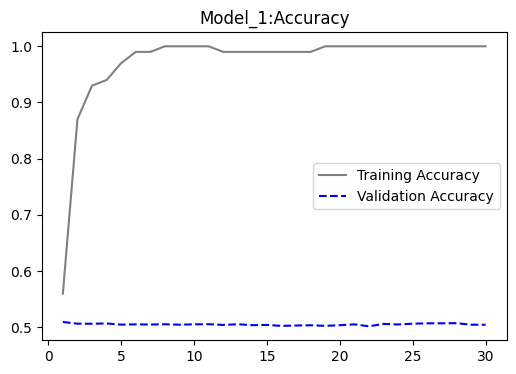

<Figure size 640x480 with 0 Axes>

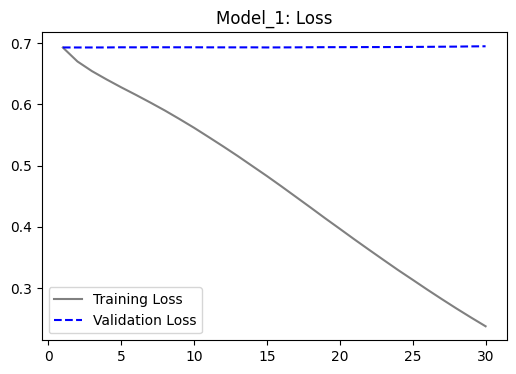

In [ ]:
accuracy = Model_1.history['accuracy']
val_accuracy = Model_1.history['val_accuracy']

loss = Model_1.history["loss"]
val_loss = Model_1.history["val_loss"]

epochs = range(1, len(accuracy) + 1)

plt.figure(figsize=(6,4))
plt.plot(epochs, accuracy, color="grey", label="Training Accuracy")
plt.plot(epochs, val_accuracy, color="blue",linestyle="dashed", label="Validation Accuracy")
plt.title("Model_1:Accuracy")
plt.legend()
plt.figure()

plt.figure(figsize=(6,4))
plt.plot(epochs, loss, color="grey", label="Training Loss")
plt.plot(epochs, val_loss, color="blue", linestyle="dashed", label="Validation Loss")
plt.title("Model_1: Loss")
plt.legend()
plt.show()

In [ ]:
test_model = load_model('model1.h5')
Model1_Results = test_model.evaluate(test_texts,test_labels)
print(f'Loss: {Model1_Results[0]:.3f}')
print(f'Accuracy: {Model1_Results[1]:.3f}')

157/157 [==============================] - 0s 2ms/step - loss: 0.6934 - accuracy: 0.5004
Loss: 0.693
Accuracy: 0.500


The model was trained on 100 samples only. The model achived the accuracy of 50%, considering our dataset size of 100 this can be considered as a fairly good result. In upcoming model we will increase the size of model training data set.

Model 2: Basic model just using embedded layer with training sample of 5000

In [ ]:
#Setting Up
num_words = 10000
maxlen = 150

#Loading the Data, Padding the Sequences
(train_data, train_labels), (test_data, test_labels) = imdb.load_data(num_words=num_words)
train_data = pad_sequences(train_data, maxlen=maxlen)
test_data = pad_sequences(test_data, maxlen=maxlen)

# Combining Data
texts = np.concatenate((train_data, test_data), axis=0)
labels = np.concatenate((train_labels, test_labels), axis=0)

# Splitting into Training and Validation Sets
train_texts, val_texts, train_labels, val_labels = train_test_split(texts, labels, train_size=5000, test_size=10000, random_state=42, stratify=labels)

# Further Splitting the Testing Data
_, test_texts, _, test_labels = train_test_split(test_data, test_labels, test_size=5000, random_state=42, stratify=test_labels)

In [ ]:
train_texts.shape

(5000, 150)

In [ ]:
val_texts.shape

(10000, 150)

In [ ]:
test_texts.shape

(5000, 150)

Model Building :

In [ ]:
model = Sequential()
model.add(Embedding(10000, 8, input_length=maxlen))
model.add(Flatten())
model.add(Dense(1, activation = 'sigmoid'))
model.compile(optimizer = 'rmsprop', loss = 'binary_crossentropy', metrics = ['accuracy'])
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_1 (Embedding)     (None, 150, 8)            80000     
                                                                 
 flatten_1 (Flatten)         (None, 1200)              0         
                                                                 
 dense_1 (Dense)             (None, 1)                 1201      
                                                                 
Total params: 81201 (317.19 KB)
Trainable params: 81201 (317.19 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [ ]:
# Setting Callbacks
callbacks = ModelCheckpoint(
            filepath= "model2.h5",
            save_best_only= True,
            monitor= "val_loss"
            )


# Model Fit - Running the Model
Model_2 = model.fit(train_texts, train_labels,
                    epochs=30,
                    batch_size=32,
                    validation_data=(val_texts, val_labels),
                    callbacks=callbacks)

Epoch 1/30
157/157 [==============================] - 12s 75ms/step - loss: 0.6911 - accuracy: 0.5318 - val_loss: 0.6863 - val_accuracy: 0.5825
Epoch 2/30
  2/157 [..............................] - ETA: 10s - loss: 0.6674 - accuracy: 0.7344

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


157/157 [==============================] - 7s 43ms/step - loss: 0.6520 - accuracy: 0.7494 - val_loss: 0.6395 - val_accuracy: 0.6963
Epoch 3/30
157/157 [==============================] - 4s 26ms/step - loss: 0.5520 - accuracy: 0.8190 - val_loss: 0.5444 - val_accuracy: 0.7688
Epoch 4/30
157/157 [==============================] - 3s 19ms/step - loss: 0.4256 - accuracy: 0.8738 - val_loss: 0.4622 - val_accuracy: 0.8059
Epoch 5/30
157/157 [==============================] - 3s 21ms/step - loss: 0.3246 - accuracy: 0.9074 - val_loss: 0.4082 - val_accuracy: 0.8262
Epoch 6/30
157/157 [==============================] - 2s 15ms/step - loss: 0.2526 - accuracy: 0.9304 - val_loss: 0.3799 - val_accuracy: 0.8367
Epoch 7/30
157/157 [==============================] - 2s 12ms/step - loss: 0.2003 - accuracy: 0.9456 - val_loss: 0.3659 - val_accuracy: 0.8413
Epoch 8/30
157/157 [==============================] - 1s 9ms/step - loss: 0.1594 - accuracy: 0.9614 - val_loss: 0.3623 - val_accuracy: 0.8433
Epoch 9/30


Let's ploat the Accuracy and loss for training and validation we have recived in this model.

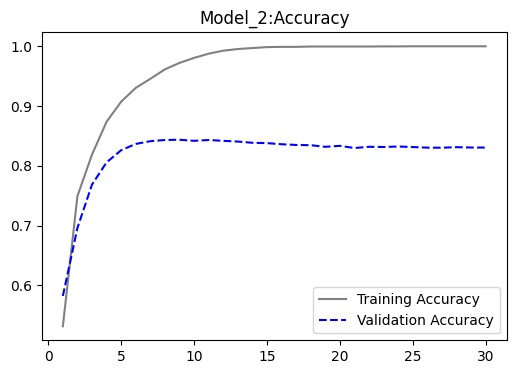

<Figure size 640x480 with 0 Axes>

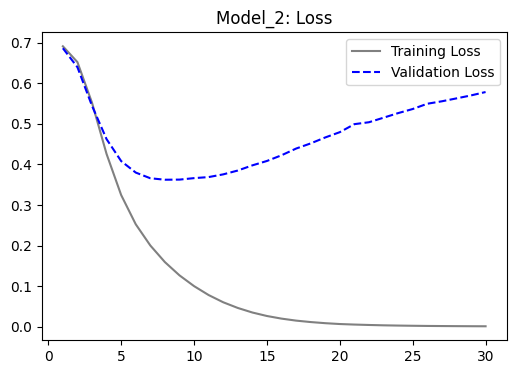

In [ ]:
accuracy = Model_2.history['accuracy']
val_accuracy = Model_2.history['val_accuracy']

loss = Model_2.history["loss"]
val_loss = Model_2.history["val_loss"]

epochs = range(1, len(accuracy) + 1)

plt.figure(figsize=(6,4))
plt.plot(epochs, accuracy, color="grey", label="Training Accuracy")
plt.plot(epochs, val_accuracy, color="blue",linestyle="dashed", label="Validation Accuracy")
plt.title("Model_2:Accuracy")
plt.legend()
plt.figure()

plt.figure(figsize=(6,4))
plt.plot(epochs, loss, color="grey", label="Training Loss")
plt.plot(epochs, val_loss, color="blue", linestyle="dashed", label="Validation Loss")
plt.title("Model_2: Loss")
plt.legend()
plt.show()

In [ ]:
test_model = load_model('model2.h5')
Model2_Results = test_model.evaluate(test_texts,test_labels)
print(f'Loss: {Model2_Results[0]:.3f}')
print(f'Accuracy: {Model2_Results[1]:.3f}')

157/157 [==============================] - 0s 2ms/step - loss: 0.3260 - accuracy: 0.8580
Loss: 0.326
Accuracy: 0.858


We can see that as we increased the sample size from 100 to 5000, we saw a huge improvement and high accuracy of 85.8%. Now, when we will further increase the training sample size.

Model 3: Basic model just using embedded layer with training sample size of 10000

In [ ]:
#Setting Limits
num_words = 10000
maxlen = 150

#Loading the Data
(train_data, train_labels), (test_data, test_labels) = imdb.load_data(num_words=num_words)
train_data = pad_sequences(train_data, maxlen=maxlen)
test_data = pad_sequences(test_data, maxlen=maxlen)

# Combining the Training and Testing data create an entire dataset
texts = np.concatenate((train_data, test_data), axis=0)
labels = np.concatenate((train_labels, test_labels), axis=0)

# Splitting into Training, Validation, and Testing Sets
train_texts, val_texts, train_labels, val_labels = train_test_split(texts, labels, train_size=10000, test_size=10000, random_state=42, stratify=labels)

# Further Splitting the Testing Data
_, test_texts, _, test_labels = train_test_split(test_data, test_labels, test_size=5000, random_state=42, stratify=test_labels)

In [ ]:
train_texts.shape

(10000, 150)

In [ ]:
val_texts.shape

(10000, 150)

In [ ]:
test_texts.shape

(5000, 150)

Model Building:

In [ ]:
model = Sequential()
model.add(Embedding(10000, 8, input_length=maxlen))
model.add(Flatten())
model.add(Dense(1, activation = 'sigmoid'))
model.compile(optimizer = 'rmsprop', loss = 'binary_crossentropy', metrics = ['accuracy'])
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_2 (Embedding)     (None, 150, 8)            80000     
                                                                 
 flatten_2 (Flatten)         (None, 1200)              0         
                                                                 
 dense_2 (Dense)             (None, 1)                 1201      
                                                                 
Total params: 81201 (317.19 KB)
Trainable params: 81201 (317.19 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [ ]:
# Setting Callbacks
callbacks = ModelCheckpoint(
            filepath= "model3.h5",
            save_best_only= True,
            monitor= "val_loss"
            )


# Model Fit - Running the Model
Model_3 = model.fit(train_texts, train_labels,
                    epochs=30,
                    batch_size=32,
                    validation_data=(val_texts, val_labels),
                    callbacks=callbacks)

Epoch 1/30
313/313 [==============================] - 13s 38ms/step - loss: 0.6809 - accuracy: 0.5855 - val_loss: 0.6460 - val_accuracy: 0.6947
Epoch 2/30
 10/313 [..............................] - ETA: 3s - loss: 0.6250 - accuracy: 0.7344 

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


313/313 [==============================] - 4s 13ms/step - loss: 0.5244 - accuracy: 0.8024 - val_loss: 0.4526 - val_accuracy: 0.8131
Epoch 3/30
313/313 [==============================] - 3s 10ms/step - loss: 0.3542 - accuracy: 0.8699 - val_loss: 0.3620 - val_accuracy: 0.8485
Epoch 4/30
313/313 [==============================] - 2s 8ms/step - loss: 0.2736 - accuracy: 0.8981 - val_loss: 0.3303 - val_accuracy: 0.8612
Epoch 5/30
313/313 [==============================] - 3s 11ms/step - loss: 0.2261 - accuracy: 0.9178 - val_loss: 0.3197 - val_accuracy: 0.8638
Epoch 6/30
313/313 [==============================] - 2s 8ms/step - loss: 0.1907 - accuracy: 0.9319 - val_loss: 0.3217 - val_accuracy: 0.8625
Epoch 7/30
313/313 [==============================] - 2s 7ms/step - loss: 0.1611 - accuracy: 0.9451 - val_loss: 0.3187 - val_accuracy: 0.8664
Epoch 8/30
313/313 [==============================] - 2s 7ms/step - loss: 0.1367 - accuracy: 0.9576 - val_loss: 0.3244 - val_accuracy: 0.8651
Epoch 9/30
313

Ploating the Accuracy and loss for training and validation

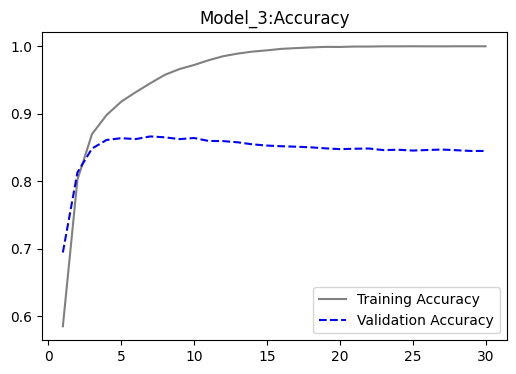

<Figure size 640x480 with 0 Axes>

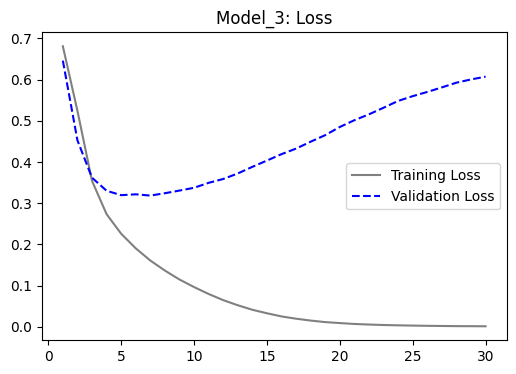

In [ ]:
accuracy = Model_3.history['accuracy']
val_accuracy = Model_3.history['val_accuracy']

loss = Model_3.history["loss"]
val_loss = Model_3.history["val_loss"]

epochs = range(1, len(accuracy) + 1)

plt.figure(figsize=(6,4))
plt.plot(epochs, accuracy, color="grey", label="Training Accuracy")
plt.plot(epochs, val_accuracy, color="blue",linestyle="dashed", label="Validation Accuracy")
plt.title("Model_3:Accuracy")
plt.legend()
plt.figure()

plt.figure(figsize=(6,4))
plt.plot(epochs, loss, color="grey", label="Training Loss")
plt.plot(epochs, val_loss, color="blue", linestyle="dashed", label="Validation Loss")
plt.title("Model_3: Loss")
plt.legend()
plt.show()

In [ ]:
test_model = load_model('model3.h5')
Model3_Results = test_model.evaluate(test_texts,test_labels)
print(f'Loss: {Model3_Results[0]:.3f}')
print(f'Accuracy: {Model3_Results[1]:.3f}')

157/157 [==============================] - 0s 2ms/step - loss: 0.2813 - accuracy: 0.8820
Loss: 0.281
Accuracy: 0.882


We tested a simple model in three ways, using different amounts of training data. The more data we used, the better the model performed. For example, with only 100 examples, the model wasn't very good (50% accurate). But with 10000 examples, the accuracy increased to 88.2%

Model 4: Using convolution 1D and Embedding layer together with training sample size of 10000

We're trying a Convolution 1D on our data with 10000 samples to see if it improves how accurate our model is. To avoid the model memorizing unimportant details ( i. e. overfitting), we're also using: MaxPooling and Dropout.

Model Building :

In [ ]:
model = Sequential()

maxlen = 150
model.add(Embedding(10000, 8, input_length=maxlen))

model.add(Conv1D(512, 3, activation='relu'))
model.add(MaxPooling1D(3))

model.add(Conv1D(256, 3, activation='relu'))
model.add(MaxPooling1D(3))

model.add(Conv1D(256, 3, activation='relu'))
model.add(Dropout(0.8))
model.add(MaxPooling1D(3))

model.add(GlobalMaxPooling1D())

model.add(Dense(256, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

adam = keras.optimizers.Adam(learning_rate = 0.0001)
model.compile(optimizer=adam, loss='binary_crossentropy', metrics=['accuracy'])
model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_3 (Embedding)     (None, 150, 8)            80000     
                                                                 
 conv1d (Conv1D)             (None, 148, 512)          12800     
                                                                 
 max_pooling1d (MaxPooling1  (None, 49, 512)           0         
 D)                                                              
                                                                 
 conv1d_1 (Conv1D)           (None, 47, 256)           393472    
                                                                 
 max_pooling1d_1 (MaxPoolin  (None, 15, 256)           0         
 g1D)                                                            
                                                                 
 conv1d_2 (Conv1D)           (None, 13, 256)          

In [ ]:
callbacks = ModelCheckpoint(
            filepath= "model4.h5",
            save_best_only= True,
            monitor= "val_loss"
            )

Model_4 = model.fit(train_texts, train_labels,
                    epochs=30,
                    batch_size=32,
                    validation_data=(val_texts, val_labels),
                    callbacks=callbacks)

Epoch 1/30
313/313 [==============================] - 36s 97ms/step - loss: 0.6929 - accuracy: 0.5084 - val_loss: 0.6929 - val_accuracy: 0.5044
Epoch 2/30
313/313 [==============================] - 11s 35ms/step - loss: 0.6695 - accuracy: 0.5727 - val_loss: 0.6413 - val_accuracy: 0.6438
Epoch 3/30
313/313 [==============================] - 7s 23ms/step - loss: 0.4626 - accuracy: 0.7775 - val_loss: 0.5568 - val_accuracy: 0.7710
Epoch 4/30
313/313 [==============================] - 7s 22ms/step - loss: 0.3421 - accuracy: 0.8535 - val_loss: 0.5112 - val_accuracy: 0.7954
Epoch 5/30
313/313 [==============================] - 5s 17ms/step - loss: 0.2807 - accuracy: 0.8846 - val_loss: 0.4853 - val_accuracy: 0.8085
Epoch 6/30
313/313 [==============================] - 4s 13ms/step - loss: 0.2297 - accuracy: 0.9117 - val_loss: 0.4798 - val_accuracy: 0.7952
Epoch 7/30
313/313 [==============================] - 4s 13ms/step - loss: 0.1875 - accuracy: 0.9299 - val_loss: 0.4469 - val_accuracy: 0.81

Let's ploat the Accuracy and loss for training and validation

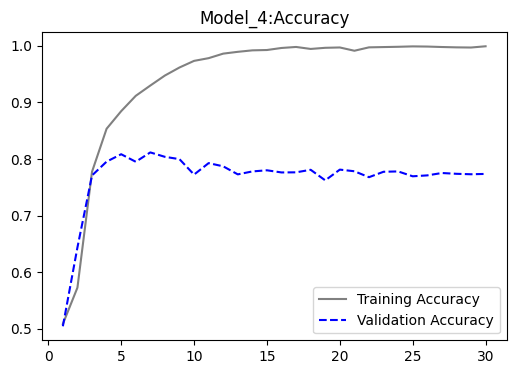

<Figure size 640x480 with 0 Axes>

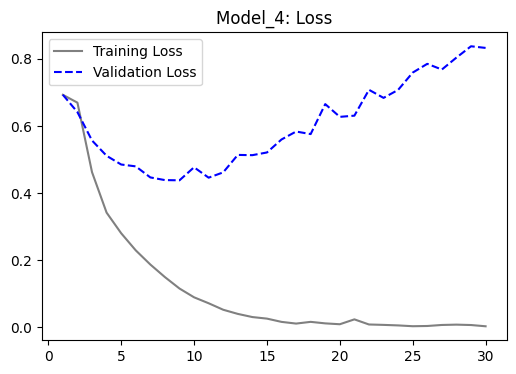

In [ ]:
accuracy = Model_4.history['accuracy']
val_accuracy = Model_4.history['val_accuracy']

loss = Model_4.history["loss"]
val_loss = Model_4.history["val_loss"]

epochs = range(1, len(accuracy) + 1)

plt.figure(figsize=(6,4))
plt.plot(epochs, accuracy, color="grey", label="Training Accuracy")
plt.plot(epochs, val_accuracy, color="blue",linestyle="dashed", label="Validation Accuracy")
plt.title("Model_4:Accuracy")
plt.legend()
plt.figure()

plt.figure(figsize=(6,4))
plt.plot(epochs, loss, color="grey", label="Training Loss")
plt.plot(epochs, val_loss, color="blue", linestyle="dashed", label="Validation Loss")
plt.title("Model_4: Loss")
plt.legend()
plt.show()

In [ ]:
test_model = load_model('model4.h5')
Model4_Results = test_model.evaluate(test_texts,test_labels)
print(f'Loss: {Model4_Results[0]:.3f}')
print(f'Accuracy: {Model4_Results[1]:.3f}')

157/157 [==============================] - 1s 4ms/step - loss: 0.3970 - accuracy: 0.8368
Loss: 0.397
Accuracy: 0.837


Here we saw that the accuracy of our model decreased from 88.2% to 83.7%. This because our data is secquential. As we know that the CNN models are good at capturing local pattern in the data. The problem in our question could be better solve using Recurrent Nueral Language.

Model 5 A sequence model built on one-hot encoded vector sequences with LSTM

Here we are using one hot encoding approach.

Model Building

In [ ]:
import tensorflow as tf
max_length = 150
max_tokens = 10000

inputs = keras.Input(shape=(None,), dtype="int64")
embedded = tf.one_hot(inputs, depth=max_tokens)

x = layers.Bidirectional(layers.LSTM(32))(embedded)
x = layers.Dropout(0.5)(x)

outputs = layers.Dense(1, activation="sigmoid")(x)

model = keras.Model(inputs, outputs)
model.compile(optimizer="rmsprop",
              loss="binary_crossentropy",
              metrics=["accuracy"])

model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, None)]            0         
                                                                 
 tf.one_hot (TFOpLambda)     (None, None, 10000)       0         
                                                                 
 bidirectional (Bidirection  (None, 64)                2568448   
 al)                                                             
                                                                 
 dropout_1 (Dropout)         (None, 64)                0         
                                                                 
 dense_5 (Dense)             (None, 1)                 65        
                                                                 
Total params: 2568513 (9.80 MB)
Trainable params: 2568513 (9.80 MB)
Non-trainable params: 0 (0.00 Byte)
_______________________

In [ ]:
callbacks = ModelCheckpoint(
            filepath= "model5.h5",
            save_best_only= True,
            monitor= "val_loss"
            )

Model_5 = model.fit(train_texts, train_labels,
                    epochs=30,
                    batch_size=32,
                    validation_data=(val_texts, val_labels),
                    callbacks=callbacks)

Epoch 1/30
313/313 [==============================] - 21s 56ms/step - loss: 0.5915 - accuracy: 0.6784 - val_loss: 0.4453 - val_accuracy: 0.8019
Epoch 2/30
313/313 [==============================] - 17s 54ms/step - loss: 0.3890 - accuracy: 0.8486 - val_loss: 0.7374 - val_accuracy: 0.7549
Epoch 3/30
313/313 [==============================] - 17s 54ms/step - loss: 0.3021 - accuracy: 0.8877 - val_loss: 0.3649 - val_accuracy: 0.8508
Epoch 4/30
313/313 [==============================] - 17s 54ms/step - loss: 0.2540 - accuracy: 0.9097 - val_loss: 0.3193 - val_accuracy: 0.8665
Epoch 5/30
313/313 [==============================] - 17s 54ms/step - loss: 0.2186 - accuracy: 0.9262 - val_loss: 0.3848 - val_accuracy: 0.8341
Epoch 6/30
313/313 [==============================] - 21s 68ms/step - loss: 0.1858 - accuracy: 0.9369 - val_loss: 0.3462 - val_accuracy: 0.8584
Epoch 7/30
313/313 [==============================] - 17s 54ms/step - loss: 0.1524 - accuracy: 0.9498 - val_loss: 0.3531 - val_accuracy:

Let's ploat the Accuracy and loss for training and validation

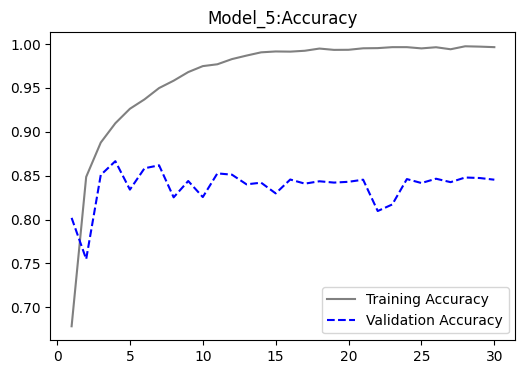

<Figure size 640x480 with 0 Axes>

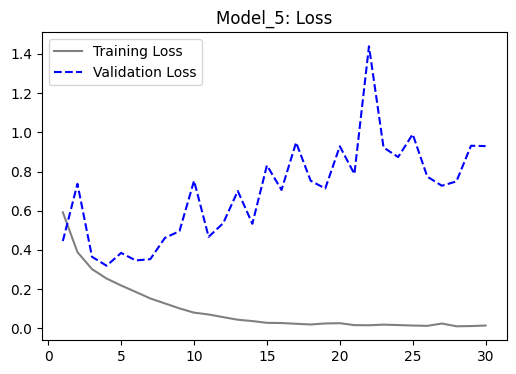

In [ ]:
accuracy = Model_5.history['accuracy']
val_accuracy = Model_5.history['val_accuracy']

loss = Model_5.history["loss"]
val_loss = Model_5.history["val_loss"]

epochs = range(1, len(accuracy) + 1)

plt.figure(figsize=(6,4))
plt.plot(epochs, accuracy, color="grey", label="Training Accuracy")
plt.plot(epochs, val_accuracy, color="blue",linestyle="dashed", label="Validation Accuracy")
plt.title("Model_5:Accuracy")
plt.legend()
plt.figure()

plt.figure(figsize=(6,4))
plt.plot(epochs, loss, color="grey", label="Training Loss")
plt.plot(epochs, val_loss, color="blue", linestyle="dashed", label="Validation Loss")
plt.title("Model_5: Loss")
plt.legend()
plt.show()

In [ ]:
test_model = load_model('model5.h5')
Model5_Results = test_model.evaluate(test_texts,test_labels)
print(f'Loss: {Model5_Results[0]:.3f}')
print(f'Accuracy: {Model5_Results[1]:.3f}')

157/157 [==============================] - 5s 22ms/step - loss: 0.2899 - accuracy: 0.8792
Loss: 0.290
Accuracy: 0.879


We've achieved accuracy of 87.9% using a training set of 10000 samples. To improve performance further, let's incorporate an LSTM model with an embedding layer.

Model 6 LSTM using embedded layer with Training Sample 10000

Model Building:

In [ ]:
max_length = 150
max_tokens = 10000

inputs = keras.Input(shape=(None,), dtype="int64")
embedded = layers.Embedding(input_dim=max_tokens, output_dim=256)(inputs)

x = layers.Bidirectional(layers.LSTM(32))(embedded)
x = layers.Dropout(0.5)(x)

outputs = layers.Dense(1, activation="sigmoid")(x)

model = keras.Model(inputs, outputs)
model.compile(optimizer="rmsprop",
              loss="binary_crossentropy",
              metrics=["accuracy"])

model.summary()

Model: "model_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_2 (InputLayer)        [(None, None)]            0         
                                                                 
 embedding_4 (Embedding)     (None, None, 256)         2560000   
                                                                 
 bidirectional_1 (Bidirecti  (None, 64)                73984     
 onal)                                                           
                                                                 
 dropout_2 (Dropout)         (None, 64)                0         
                                                                 
 dense_6 (Dense)             (None, 1)                 65        
                                                                 
Total params: 2634049 (10.05 MB)
Trainable params: 2634049 (10.05 MB)
Non-trainable params: 0 (0.00 Byte)
___________________

In [ ]:
callbacks = ModelCheckpoint(
            filepath= "model6.h5",
            save_best_only= True,
            monitor= "val_loss"
            )

Model_6 = model.fit(train_texts, train_labels,
                    epochs=30,
                    batch_size=32,
                    validation_data=(val_texts, val_labels),
                    callbacks=callbacks)

Epoch 1/30
313/313 [==============================] - 21s 56ms/step - loss: 0.5496 - accuracy: 0.7117 - val_loss: 0.4204 - val_accuracy: 0.8076
Epoch 2/30
313/313 [==============================] - 10s 32ms/step - loss: 0.3471 - accuracy: 0.8600 - val_loss: 0.3712 - val_accuracy: 0.8366
Epoch 3/30
313/313 [==============================] - 8s 25ms/step - loss: 0.2682 - accuracy: 0.8977 - val_loss: 0.3546 - val_accuracy: 0.8445
Epoch 4/30
313/313 [==============================] - 6s 21ms/step - loss: 0.2146 - accuracy: 0.9210 - val_loss: 0.3663 - val_accuracy: 0.8515
Epoch 5/30
313/313 [==============================] - 7s 23ms/step - loss: 0.1719 - accuracy: 0.9381 - val_loss: 0.3705 - val_accuracy: 0.8488
Epoch 6/30
313/313 [==============================] - 6s 21ms/step - loss: 0.1374 - accuracy: 0.9530 - val_loss: 0.4244 - val_accuracy: 0.8458
Epoch 7/30
313/313 [==============================] - 7s 24ms/step - loss: 0.1092 - accuracy: 0.9621 - val_loss: 0.4864 - val_accuracy: 0.83

Let's plot the Accuracy and loss for training and validation

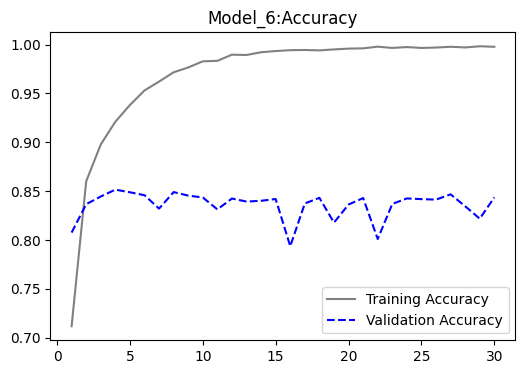

<Figure size 640x480 with 0 Axes>

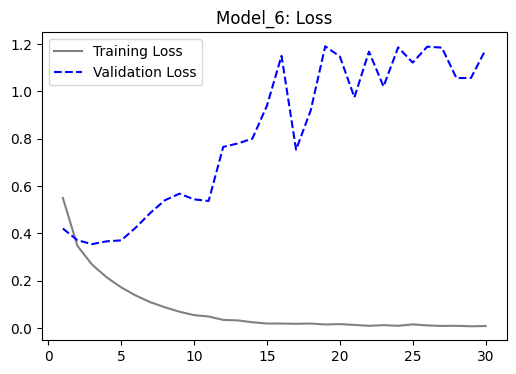

In [ ]:
accuracy = Model_6.history['accuracy']
val_accuracy = Model_6.history['val_accuracy']

loss = Model_6.history["loss"]
val_loss = Model_6.history["val_loss"]

epochs = range(1, len(accuracy) + 1)

plt.figure(figsize=(6,4))
plt.plot(epochs, accuracy, color="grey",  label="Training Accuracy")
plt.plot(epochs, val_accuracy, color="blue",linestyle="dashed", label="Validation Accuracy")
plt.title("Model_6:Accuracy")
plt.legend()
plt.figure()

plt.figure(figsize=(6,4))
plt.plot(epochs, loss, color="grey", label="Training Loss")
plt.plot(epochs, val_loss, color="blue", linestyle="dashed", label="Validation Loss")
plt.title("Model_6: Loss")
plt.legend()
plt.show()

In [ ]:
test_model = load_model('model6.h5')
Model6_Results = test_model.evaluate(test_texts,test_labels)
print(f'Loss: {Model6_Results[0]:.3f}')
print(f'Accuracy: {Model6_Results[1]:.3f}')

157/157 [==============================] - 3s 9ms/step - loss: 0.3249 - accuracy: 0.8638
Loss: 0.325
Accuracy: 0.864


Model 7 LSTM using embedded layer with Training Sample 20000

In [ ]:
num_words = 10000
maxlen = 150

(train_data, train_labels), (test_data, test_labels) = imdb.load_data(num_words=num_words)
train_data = pad_sequences(train_data, maxlen=maxlen)
test_data = pad_sequences(test_data, maxlen=maxlen)

texts = np.concatenate((train_data, test_data), axis=0)
labels = np.concatenate((train_labels, test_labels), axis=0)

train_texts, val_texts, train_labels, val_labels = train_test_split(texts, labels, train_size=20000, test_size=10000, random_state=42, stratify=labels)

_, test_texts, _, test_labels = train_test_split(test_data, test_labels, test_size=5000, random_state=42, stratify=test_labels)

In [ ]:
train_texts.shape

(20000, 150)

In [ ]:
val_texts.shape

(10000, 150)

Model Building:

In [ ]:
max_length = 150
max_tokens = 10000

inputs = keras.Input(shape=(None,), dtype="int64")
embedded = layers.Embedding(input_dim=max_tokens, output_dim=256)(inputs)

x = layers.Bidirectional(layers.LSTM(32))(embedded)
x = layers.Dropout(0.5)(x)

outputs = layers.Dense(1, activation="sigmoid")(x)

model = keras.Model(inputs, outputs)
model.compile(optimizer="rmsprop",
              loss="binary_crossentropy",
              metrics=["accuracy"])

model.summary()

Model: "model_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_3 (InputLayer)        [(None, None)]            0         
                                                                 
 embedding_5 (Embedding)     (None, None, 256)         2560000   
                                                                 
 bidirectional_2 (Bidirecti  (None, 64)                73984     
 onal)                                                           
                                                                 
 dropout_3 (Dropout)         (None, 64)                0         
                                                                 
 dense_7 (Dense)             (None, 1)                 65        
                                                                 
Total params: 2634049 (10.05 MB)
Trainable params: 2634049 (10.05 MB)
Non-trainable params: 0 (0.00 Byte)
___________________

In [ ]:
callbacks = ModelCheckpoint(
            filepath= "model7.h5",
            save_best_only= True,
            monitor= "val_loss"
            )

Model7 = model.fit(train_texts, train_labels,
                    epochs=30,
                    batch_size=32,
                    validation_data=(val_texts, val_labels),
                    callbacks=callbacks)

Epoch 1/30
625/625 [==============================] - 27s 40ms/step - loss: 0.4570 - accuracy: 0.7857 - val_loss: 0.3390 - val_accuracy: 0.8545
Epoch 2/30
  6/625 [..............................] - ETA: 15s - loss: 0.3073 - accuracy: 0.8854

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


625/625 [==============================] - 13s 21ms/step - loss: 0.2979 - accuracy: 0.8807 - val_loss: 0.3014 - val_accuracy: 0.8694
Epoch 3/30
625/625 [==============================] - 12s 19ms/step - loss: 0.2463 - accuracy: 0.9057 - val_loss: 0.3103 - val_accuracy: 0.8770
Epoch 4/30
625/625 [==============================] - 11s 18ms/step - loss: 0.2069 - accuracy: 0.9235 - val_loss: 0.3052 - val_accuracy: 0.8769
Epoch 5/30
625/625 [==============================] - 11s 18ms/step - loss: 0.1774 - accuracy: 0.9373 - val_loss: 0.3381 - val_accuracy: 0.8766
Epoch 6/30
625/625 [==============================] - 12s 19ms/step - loss: 0.1439 - accuracy: 0.9487 - val_loss: 0.3543 - val_accuracy: 0.8738
Epoch 7/30
625/625 [==============================] - 10s 17ms/step - loss: 0.1172 - accuracy: 0.9592 - val_loss: 0.4753 - val_accuracy: 0.8708
Epoch 8/30
625/625 [==============================] - 11s 17ms/step - loss: 0.0932 - accuracy: 0.9694 - val_loss: 0.3930 - val_accuracy: 0.8675
Epo

**Ploating the Accuracy and loss for training and validation**

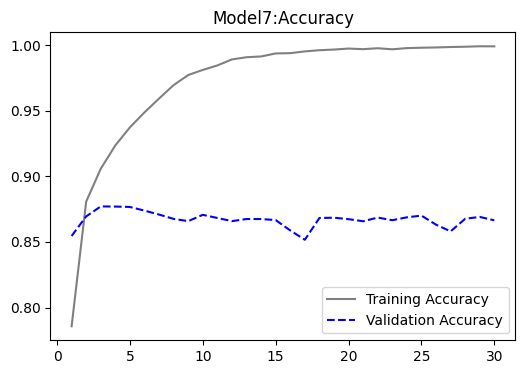

<Figure size 640x480 with 0 Axes>

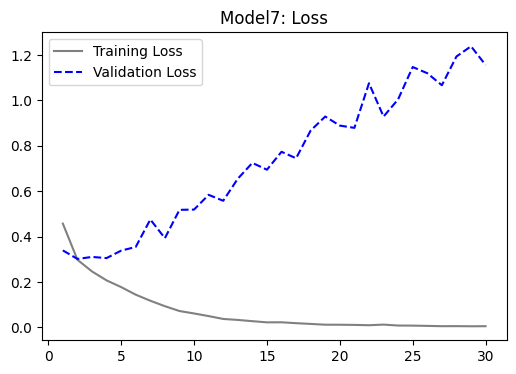

In [ ]:
accuracy = Model7.history['accuracy']
val_accuracy = Model7.history['val_accuracy']

loss = Model7.history["loss"]
val_loss = Model7.history["val_loss"]

epochs = range(1, len(accuracy) + 1)

plt.figure(figsize=(6,4))
plt.plot(epochs, accuracy, color="grey", label="Training Accuracy")
plt.plot(epochs, val_accuracy, color="blue",linestyle="dashed", label="Validation Accuracy")
plt.title("Model7:Accuracy")
plt.legend()
plt.figure()

plt.figure(figsize=(6,4))
plt.plot(epochs, loss, color="grey", label="Training Loss")
plt.plot(epochs, val_loss, color="blue", linestyle="dashed", label="Validation Loss")
plt.title("Model7: Loss")
plt.legend()
plt.show()

In [ ]:
test_model = load_model('model7.h5')
Model7_Results = test_model.evaluate(test_texts,test_labels)
print(f'Loss: {Model7_Results[0]:.3f}')
print(f'Accuracy: {Model7_Results[1]:.3f}')

157/157 [==============================] - 2s 7ms/step - loss: 0.2702 - accuracy: 0.8884
Loss: 0.270
Accuracy: 0.888


In previous two models we created two model with different sample size. The model with 20000 samples showed improved accuracy and achived 88.8% accuracy, which is one of the highest till now.

Model 8 LSTM with embedding layer and Masking enable with training sample size as 20000

Model Building :

In [ ]:
inputs = keras.Input(shape=(None,), dtype="int64")
embedded = layers.Embedding(
    input_dim=max_tokens, output_dim=256, mask_zero=True)(inputs)
x = layers.Bidirectional(layers.LSTM(32))(embedded)
x = layers.Dropout(0.5)(x)
outputs = layers.Dense(1, activation="sigmoid")(x)
model = keras.Model(inputs, outputs)
model.compile(optimizer="rmsprop",
              loss="binary_crossentropy",
              metrics=["accuracy"])
model.summary()

Model: "model_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_4 (InputLayer)        [(None, None)]            0         
                                                                 
 embedding_6 (Embedding)     (None, None, 256)         2560000   
                                                                 
 bidirectional_3 (Bidirecti  (None, 64)                73984     
 onal)                                                           
                                                                 
 dropout_4 (Dropout)         (None, 64)                0         
                                                                 
 dense_8 (Dense)             (None, 1)                 65        
                                                                 
Total params: 2634049 (10.05 MB)
Trainable params: 2634049 (10.05 MB)
Non-trainable params: 0 (0.00 Byte)
___________________

In [ ]:
callbacks = ModelCheckpoint(
            filepath= "model8.h5",
            save_best_only= True,
            monitor= "val_loss"
            )

Model_8 = model.fit(train_texts, train_labels,
                    epochs=30,
                    batch_size=32,
                    validation_data=(val_texts, val_labels),
                    callbacks=callbacks)

Epoch 1/30
625/625 [==============================] - 268s 417ms/step - loss: 0.4443 - accuracy: 0.7844 - val_loss: 0.3289 - val_accuracy: 0.8532
Epoch 2/30
625/625 [==============================] - 246s 393ms/step - loss: 0.2926 - accuracy: 0.8839 - val_loss: 0.3015 - val_accuracy: 0.8690
Epoch 3/30
625/625 [==============================] - 225s 360ms/step - loss: 0.2348 - accuracy: 0.9093 - val_loss: 0.2944 - val_accuracy: 0.8738
Epoch 4/30
625/625 [==============================] - 242s 387ms/step - loss: 0.1964 - accuracy: 0.9272 - val_loss: 0.3027 - val_accuracy: 0.8753
Epoch 5/30
625/625 [==============================] - 239s 382ms/step - loss: 0.1624 - accuracy: 0.9406 - val_loss: 0.3666 - val_accuracy: 0.8685
Epoch 6/30
625/625 [==============================] - 219s 351ms/step - loss: 0.1295 - accuracy: 0.9540 - val_loss: 0.3556 - val_accuracy: 0.8705
Epoch 7/30
625/625 [==============================] - 238s 382ms/step - loss: 0.1033 - accuracy: 0.9643 - val_loss: 0.4227 -

Let's ploat the Accuracy and loss for training and validation graph

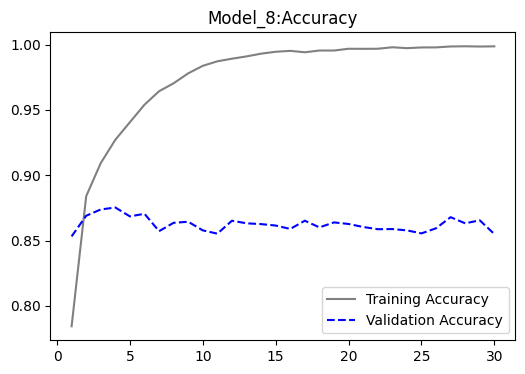

<Figure size 640x480 with 0 Axes>

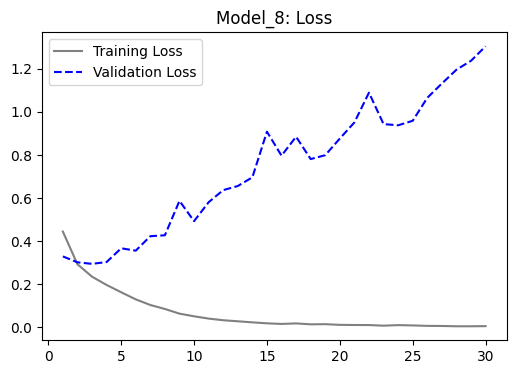

In [ ]:
accuracy = Model_8.history['accuracy']
val_accuracy = Model_8.history['val_accuracy']

loss = Model_8.history["loss"]
val_loss = Model_8.history["val_loss"]

epochs = range(1, len(accuracy) + 1)

plt.figure(figsize=(6,4))
plt.plot(epochs, accuracy, color="grey", label="Training Accuracy")
plt.plot(epochs, val_accuracy, color="blue",linestyle="dashed", label="Validation Accuracy")
plt.title("Model_8:Accuracy")
plt.legend()
plt.figure()

plt.figure(figsize=(6,4))
plt.plot(epochs, loss, color="grey", label="Training Loss")
plt.plot(epochs, val_loss, color="blue", linestyle="dashed", label="Validation Loss")
plt.title("Model_8: Loss")
plt.legend()
plt.show()

In [ ]:
test_model = load_model('model8.h5')
Model8_Results = test_model.evaluate(test_texts,test_labels)
print(f'Loss: {Model8_Results[0]:.3f}')
print(f'Accuracy: {Model8_Results[1]:.3f}')

157/157 [==============================] - 13s 72ms/step - loss: 0.2474 - accuracy: 0.9018
Loss: 0.247
Accuracy: 0.902


Model 9 Transformers with embedding layer and training sample size 20000

In this model we will utilize the transforemer. Transformer are one the very efficint architecgture in machine leraning.

Model Building

In [ ]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers

class TransformerEncoder(layers.Layer):
    def __init__(self, embed_dim, dense_dim, num_heads, **kwargs):
        super().__init__(**kwargs)
        self.embed_dim = embed_dim
        self.dense_dim = dense_dim
        self.num_heads = num_heads
        self.attention = layers.MultiHeadAttention(
            num_heads=num_heads, key_dim=embed_dim)
        self.dense_proj = keras.Sequential(
            [layers.Dense(dense_dim, activation="relu"),
             layers.Dense(embed_dim),]
        )
        self.layernorm_1 = layers.LayerNormalization()
        self.layernorm_2 = layers.LayerNormalization()

    def call(self, inputs, mask=None):
        if mask is not None:
            mask = mask[:, tf.newaxis, :]
        attention_output = self.attention(
            inputs, inputs, attention_mask=mask)
        proj_input = self.layernorm_1(inputs + attention_output)
        proj_output = self.dense_proj(proj_input)
        return self.layernorm_2(proj_input + proj_output)

    def get_config(self):
        config = super().get_config()
        config.update({
            "embed_dim": self.embed_dim,
            "num_heads": self.num_heads,
            "dense_dim": self.dense_dim,
        })
        return config

In [ ]:
vocab_size = 10000
embed_dim = 150
num_heads = 2
dense_dim = 32
maxlen = 150

inputs = keras.Input(shape=(maxlen,), dtype="int64")
x = layers.Embedding(vocab_size, embed_dim)(inputs)
x = TransformerEncoder(embed_dim, dense_dim, num_heads)(x)
x = layers.GlobalMaxPooling1D()(x)
x = layers.Dropout(0.5)(x)

outputs = layers.Dense(1, activation="sigmoid")(x)
model = keras.Model(inputs, outputs)
model.compile(optimizer="rmsprop",
              loss="binary_crossentropy",
              metrics=["accuracy"])

model.summary()

Model: "model_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_5 (InputLayer)        [(None, 150)]             0         
                                                                 
 embedding_7 (Embedding)     (None, 150, 150)          1500000   
                                                                 
 transformer_encoder (Trans  (None, 150, 150)          191432    
 formerEncoder)                                                  
                                                                 
 global_max_pooling1d_1 (Gl  (None, 150)               0         
 obalMaxPooling1D)                                               
                                                                 
 dropout_5 (Dropout)         (None, 150)               0         
                                                                 
 dense_11 (Dense)            (None, 1)                 151 

In [ ]:
callbacks = ModelCheckpoint(
            filepath= "model9.h5",
            save_best_only= True,
            monitor= "val_loss"
            )

Model_9 = model.fit(train_texts, train_labels,
                    epochs=30,
                    batch_size=32,
                    validation_data=(val_texts, val_labels),
                    callbacks=callbacks)

Epoch 1/30
625/625 [==============================] - 33s 49ms/step - loss: 0.4988 - accuracy: 0.7655 - val_loss: 0.3784 - val_accuracy: 0.8292
Epoch 2/30
625/625 [==============================] - 10s 17ms/step - loss: 0.3176 - accuracy: 0.8674 - val_loss: 0.3027 - val_accuracy: 0.8711
Epoch 3/30
625/625 [==============================] - 9s 14ms/step - loss: 0.2633 - accuracy: 0.8936 - val_loss: 0.2972 - val_accuracy: 0.8726
Epoch 4/30
625/625 [==============================] - 8s 13ms/step - loss: 0.2289 - accuracy: 0.9089 - val_loss: 0.2998 - val_accuracy: 0.8723
Epoch 5/30
625/625 [==============================] - 8s 14ms/step - loss: 0.2051 - accuracy: 0.9196 - val_loss: 0.3575 - val_accuracy: 0.8646
Epoch 6/30
625/625 [==============================] - 7s 11ms/step - loss: 0.1910 - accuracy: 0.9265 - val_loss: 0.3154 - val_accuracy: 0.8720
Epoch 7/30
625/625 [==============================] - 8s 14ms/step - loss: 0.1748 - accuracy: 0.9324 - val_loss: 0.3421 - val_accuracy: 0.86

Let's ploat the Accuracy and loss for training and validation curve.

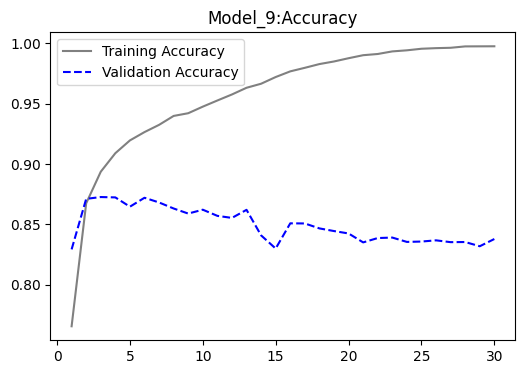

<Figure size 640x480 with 0 Axes>

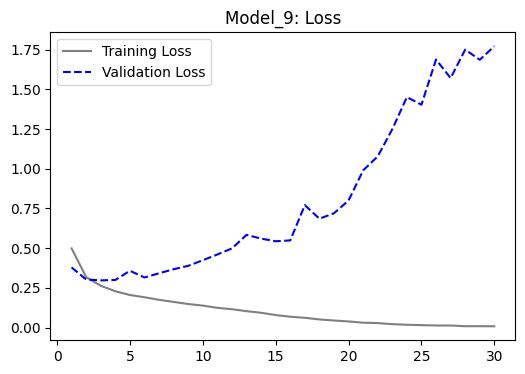

In [ ]:
accuracy = Model_9.history['accuracy']
val_accuracy = Model_9.history['val_accuracy']

loss = Model_9.history["loss"]
val_loss = Model_9.history["val_loss"]

epochs = range(1, len(accuracy) + 1)

plt.figure(figsize=(6,4))
plt.plot(epochs, accuracy, color="grey", label="Training Accuracy")
plt.plot(epochs, val_accuracy, color="blue",linestyle="dashed", label="Validation Accuracy")
plt.title("Model_9:Accuracy")
plt.legend()
plt.figure()

plt.figure(figsize=(6,4))
plt.plot(epochs, loss, color="grey", label="Training Loss")
plt.plot(epochs, val_loss, color="blue", linestyle="dashed", label="Validation Loss")
plt.title("Model_9: Loss")
plt.legend()
plt.show()

In [ ]:
test_model = load_model('model9.h5', custom_objects={'TransformerEncoder': TransformerEncoder})

Model9_Results = test_model.evaluate(test_texts, test_labels)
print(f'Loss: {Model9_Results[0]:.3f}')
print(f'Accuracy: {Model9_Results[1]:.3f}')

157/157 [==============================] - 1s 6ms/step - loss: 0.2637 - accuracy: 0.8880
Loss: 0.264
Accuracy: 0.888


Let's use PreTrained Models

GloVe is an unsupervised learning algorithm for obtaining vector representations for words. Training is performed on aggregated global word-word co-occurrence statistics from a corpus, and the resulting representations showcase interesting linear substructures of the word vector space.

In [ ]:
!curl -O https://ai.stanford.edu/~amaas/data/sentiment/aclImdb_v1.tar.gz
!tar -xf aclImdb_v1.tar.gz

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100 80.2M  100 80.2M    0     0  10.1M      0  0:00:07  0:00:07 --:--:-- 12.8M


In [ ]:
!rm -r aclImdb/train/unsup

In [ ]:
imdb_dir = '/content/aclImdb'
train_dir = os.path.join(imdb_dir, 'train')

labels = []
texts = []

for label_type in ['neg', 'pos']:
    dir_name = os.path.join(train_dir, label_type)
    for fname in os.listdir(dir_name):
        if fname[-4:] == '.txt':
            f = open(os.path.join(dir_name, fname))
            texts.append(f.read())
            f.close()
            if label_type == 'neg':
                labels.append(0)
            else:
                labels.append(1)

In [ ]:
print('Number of Samples', len(texts))

Number of Samples 25000


In [ ]:
#Lets use all the contrained defined in our question.
maxlen = 150
training_samples = 100
validation_samples = 10000
max_words = 10000

tokenizer = Tokenizer(num_words=max_words)
tokenizer.fit_on_texts(texts)
sequences = tokenizer.texts_to_sequences(texts)

word_index = tokenizer.word_index
print('We have found %s unique tokens.' % len(word_index))

data = pad_sequences(sequences, maxlen=maxlen)

labels = np.asarray(labels)
print('Shape of data tensor:', data.shape)
print('Shape of label tensor:', labels.shape)

indices = np.arange(data.shape[0])
np.random.shuffle(indices)
data = data[indices]
labels = labels[indices]

x_train = data[:training_samples]
y_train = labels[:training_samples]
x_val = data[training_samples: training_samples + validation_samples]
y_val = labels[training_samples: training_samples + validation_samples]


test_dir = os.path.join(imdb_dir, 'test')

labels = []
texts = []

for label_type in ['neg', 'pos']:
    dir_name = os.path.join(test_dir, label_type)
    for fname in sorted(os.listdir(dir_name)):
        if fname[-4:] == '.txt':
            f = open(os.path.join(dir_name, fname))
            texts.append(f.read())
            f.close()
            if label_type == 'neg':
                labels.append(0)
            else:
                labels.append(1)

sequences = tokenizer.texts_to_sequences(texts)
x_test = pad_sequences(sequences, maxlen=maxlen)[:5000]
y_test = np.asarray(labels)[:5000]

We have found 88582 unique tokens.
Shape of data tensor: (25000, 150)
Shape of label tensor: (25000,)


In [ ]:
x_train.shape

(100, 150)

In [ ]:
x_val.shape

(10000, 150)

In [ ]:
x_test.shape

(5000, 150)

In [ ]:
!wget http://nlp.stanford.edu/data/glove.6B.zip
!unzip -q glove.6B.zip

--2024-05-05 08:44:27--  http://nlp.stanford.edu/data/glove.6B.zip
Resolving nlp.stanford.edu (nlp.stanford.edu)... 171.64.67.140
Connecting to nlp.stanford.edu (nlp.stanford.edu)|171.64.67.140|:80... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://nlp.stanford.edu/data/glove.6B.zip [following]
--2024-05-05 08:44:27--  https://nlp.stanford.edu/data/glove.6B.zip
Connecting to nlp.stanford.edu (nlp.stanford.edu)|171.64.67.140|:443... connected.
HTTP request sent, awaiting response... 301 Moved Permanently
Location: https://downloads.cs.stanford.edu/nlp/data/glove.6B.zip [following]
--2024-05-05 08:44:27--  https://downloads.cs.stanford.edu/nlp/data/glove.6B.zip
Resolving downloads.cs.stanford.edu (downloads.cs.stanford.edu)... 171.64.64.22
Connecting to downloads.cs.stanford.edu (downloads.cs.stanford.edu)|171.64.64.22|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 862182613 (822M) [application/zip]
Saving to: ‘glove.6B.zip’

glov

In [ ]:
import numpy as np
path_to_glove_file = "glove.6B.100d.txt"

embeddings_index = {}
with open(path_to_glove_file) as f:
    for line in f:
        word, coefs = line.split(maxsplit=1)
        coefs = np.fromstring(coefs, "f", sep=" ")
        embeddings_index[word] = coefs

print(f"Found {len(embeddings_index)} word vectors.")

Found 400000 word vectors.


In [ ]:
embedding_dim = 100

embedding_matrix = np.zeros((max_words, embedding_dim))
for word, i in word_index.items():
    embedding_vector = embeddings_index.get(word)
    if i < max_words:
        if embedding_vector is not None:
            # Words not found in embedding index will be all-zeros.
            embedding_matrix[i] = embedding_vector

Model 10 Pretrained Models with Training sample size 100 we are using GloVe model

Building model

In [ ]:
model = Sequential()
model.add(Embedding(max_words, embedding_dim, input_length=maxlen))
model.add(LSTM(32))
model.add(Dense(1, activation='sigmoid'))

model.layers[0].set_weights([embedding_matrix])
model.layers[0].trainable = False

adam = keras.optimizers.Adam(learning_rate = 0.0001)
model.compile(optimizer=adam, loss='binary_crossentropy', metrics=['accuracy'])
model.summary()

Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_8 (Embedding)     (None, 150, 100)          1000000   
                                                                 
 lstm_4 (LSTM)               (None, 32)                17024     
                                                                 
 dense_14 (Dense)            (None, 1)                 33        
                                                                 
Total params: 1017057 (3.88 MB)
Trainable params: 17057 (66.63 KB)
Non-trainable params: 1000000 (3.81 MB)
_________________________________________________________________


In [ ]:
callbacks=callbacks = ModelCheckpoint(
            filepath= "premodel1.keras",
            save_best_only= True,
            monitor= "val_loss"
            )

Pre_Model_1 =  model.fit(x_train, y_train,
                     epochs=30,
                     batch_size=32,
                     validation_data=(x_val, y_val),
                     callbacks=callbacks)

Epoch 1/30
4/4 [==============================] - 4s 657ms/step - loss: 0.6993 - accuracy: 0.4700 - val_loss: 0.6970 - val_accuracy: 0.5044
Epoch 2/30
4/4 [==============================] - 2s 592ms/step - loss: 0.6974 - accuracy: 0.4800 - val_loss: 0.6960 - val_accuracy: 0.5022
Epoch 3/30
4/4 [==============================] - 3s 890ms/step - loss: 0.6954 - accuracy: 0.4900 - val_loss: 0.6953 - val_accuracy: 0.5066
Epoch 4/30
4/4 [==============================] - 2s 579ms/step - loss: 0.6934 - accuracy: 0.5000 - val_loss: 0.6949 - val_accuracy: 0.5030
Epoch 5/30
4/4 [==============================] - 3s 894ms/step - loss: 0.6929 - accuracy: 0.5200 - val_loss: 0.6947 - val_accuracy: 0.5093
Epoch 6/30
4/4 [==============================] - 3s 894ms/step - loss: 0.6916 - accuracy: 0.5400 - val_loss: 0.6946 - val_accuracy: 0.5103
Epoch 7/30
4/4 [==============================] - 1s 454ms/step - loss: 0.6911 - accuracy: 0.5200 - val_loss: 0.6946 - val_accuracy: 0.5113
Epoch 8/30
4/4 [====

Let's ploat the Accuracy and loss for training and validation

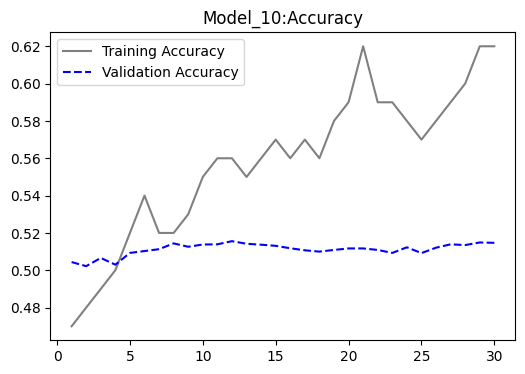

<Figure size 640x480 with 0 Axes>

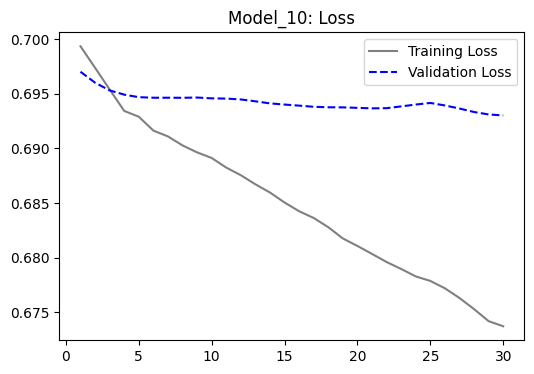

In [ ]:
accuracy = Pre_Model_1.history['accuracy']
val_accuracy = Pre_Model_1.history['val_accuracy']

loss = Pre_Model_1.history["loss"]
val_loss = Pre_Model_1.history["val_loss"]

epochs = range(1, len(accuracy) + 1)

plt.figure(figsize=(6,4))
plt.plot(epochs, accuracy, color="grey", label="Training Accuracy")
plt.plot(epochs, val_accuracy, color="blue",linestyle="dashed", label="Validation Accuracy")
plt.title("Model_10:Accuracy")
plt.legend()
plt.figure()

plt.figure(figsize=(6,4))
plt.plot(epochs, loss, color="grey", label="Training Loss")
plt.plot(epochs, val_loss, color="blue", linestyle="dashed", label="Validation Loss")
plt.title("Model_10: Loss")
plt.legend()
plt.show()

In [ ]:
test_model = load_model('premodel1.keras')
PreModel1_Results = test_model.evaluate(x_test,y_test)
print(f'Loss: {PreModel1_Results[0]:.3f}')
print(f'Accuracy: {PreModel1_Results[1]:.3f}')

157/157 [==============================] - 1s 5ms/step - loss: 0.6930 - accuracy: 0.4950
Loss: 0.693
Accuracy: 0.495


Model 11, Pretrained Models with 4 LSTM hidden layers with Training sample size 5000

In [ ]:
maxlen = 150
training_samples = 5000
validation_samples = 10000
max_words = 10000

tokenizer = Tokenizer(num_words=max_words)
tokenizer.fit_on_texts(texts)
sequences = tokenizer.texts_to_sequences(texts)

word_index = tokenizer.word_index
print('Found %s unique tokens.' % len(word_index))

data = pad_sequences(sequences, maxlen=maxlen)

labels = np.asarray(labels)
print('Shape of data tensor:', data.shape)
print('Shape of label tensor:', labels.shape)

indices = np.arange(data.shape[0])
np.random.shuffle(indices)
data = data[indices]
labels = labels[indices]

x_train = data[:training_samples]
y_train = labels[:training_samples]
x_val = data[training_samples: training_samples + validation_samples]
y_val = labels[training_samples: training_samples + validation_samples]

Found 87393 unique tokens.
Shape of data tensor: (25000, 150)
Shape of label tensor: (25000,)


In [ ]:
x_train.shape

(5000, 150)

In [ ]:
x_val.shape

(10000, 150)

Building the model

In [ ]:
model = Sequential()
model.add(Embedding(max_words, embedding_dim, input_length=maxlen))

model.add(LSTM(512, return_sequences=True))
model.add(Dropout(0.5))

model.add(LSTM(256, return_sequences=True))
model.add(Dropout(0.5))

model.add(LSTM(128, return_sequences=True))
model.add(Dropout(0.5))

model.add(LSTM(128))

model.add(Dense(256, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(256, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(1, activation='sigmoid'))

model.layers[0].set_weights([embedding_matrix])
model.layers[0].trainable = False


adam = keras.optimizers.Adam(learning_rate = 0.0001)
model.compile(optimizer=adam, loss='binary_crossentropy', metrics=['accuracy'])
model.summary()

Model: "sequential_7"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_9 (Embedding)     (None, 150, 100)          1000000   
                                                                 
 lstm_5 (LSTM)               (None, 150, 512)          1255424   
                                                                 
 dropout_6 (Dropout)         (None, 150, 512)          0         
                                                                 
 lstm_6 (LSTM)               (None, 150, 256)          787456    
                                                                 
 dropout_7 (Dropout)         (None, 150, 256)          0         
                                                                 
 lstm_7 (LSTM)               (None, 150, 128)          197120    
                                                                 
 dropout_8 (Dropout)         (None, 150, 128)         

In [ ]:
callbacks = ModelCheckpoint(
            filepath= "premodel2.keras",
            save_best_only= True,
            monitor= "val_loss"
            )

Pre_Model_2 =  model.fit(x_train, y_train,
                     epochs=40,
                     batch_size=32,
                     validation_data=(x_val, y_val),
                     callbacks=callbacks)

Epoch 1/40
157/157 [==============================] - 30s 121ms/step - loss: 0.6960 - accuracy: 0.4932 - val_loss: 0.6934 - val_accuracy: 0.5019
Epoch 2/40
157/157 [==============================] - 15s 94ms/step - loss: 0.6939 - accuracy: 0.5088 - val_loss: 0.6927 - val_accuracy: 0.4981
Epoch 3/40
157/157 [==============================] - 18s 114ms/step - loss: 0.6953 - accuracy: 0.5008 - val_loss: 0.6919 - val_accuracy: 0.5373
Epoch 4/40
157/157 [==============================] - 18s 113ms/step - loss: 0.6914 - accuracy: 0.5270 - val_loss: 0.6892 - val_accuracy: 0.5276
Epoch 5/40
157/157 [==============================] - 18s 115ms/step - loss: 0.6884 - accuracy: 0.5446 - val_loss: 0.6957 - val_accuracy: 0.4981
Epoch 6/40
157/157 [==============================] - 18s 115ms/step - loss: 0.6937 - accuracy: 0.5070 - val_loss: 0.6865 - val_accuracy: 0.5315
Epoch 7/40
157/157 [==============================] - 17s 110ms/step - loss: 0.6849 - accuracy: 0.5594 - val_loss: 0.7044 - val_acc

Let's plot the Accuracy and loss for training and validation

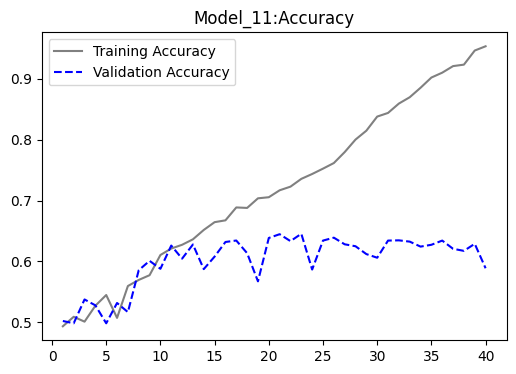

<Figure size 640x480 with 0 Axes>

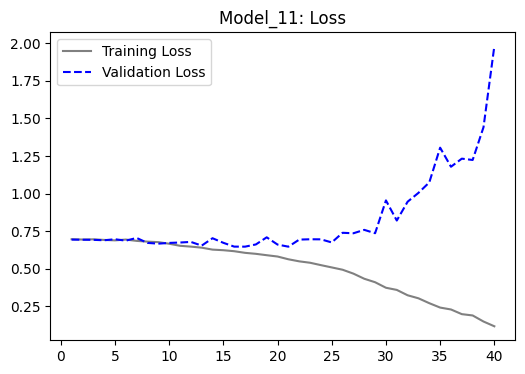

In [ ]:
accuracy = Pre_Model_2.history['accuracy']
val_accuracy = Pre_Model_2.history['val_accuracy']

loss = Pre_Model_2.history["loss"]
val_loss = Pre_Model_2.history["val_loss"]

epochs = range(1, len(accuracy) + 1)

plt.figure(figsize=(6,4))
plt.plot(epochs, accuracy, color="grey", label="Training Accuracy")
plt.plot(epochs, val_accuracy, color="blue",linestyle="dashed", label="Validation Accuracy")
plt.title("Model_11:Accuracy")
plt.legend()
plt.figure()

plt.figure(figsize=(6,4))
plt.plot(epochs, loss, color="grey", label="Training Loss")
plt.plot(epochs, val_loss, color="blue", linestyle="dashed", label="Validation Loss")
plt.title("Model_11: Loss")
plt.legend()
plt.show()

In [ ]:
test_model = load_model('premodel2.keras')
PreModel2_Results = test_model.evaluate(x_test,y_test)
print(f'Loss: {PreModel2_Results[0]:.3f}')
print(f'Accuracy: {PreModel2_Results[1]:.3f}')

157/157 [==============================] - 7s 21ms/step - loss: 0.6778 - accuracy: 0.6620
Loss: 0.678
Accuracy: 0.662


Model 12 Pretrained Models with 2 LSTM hidden layer with Training sample size 15000

In [ ]:
maxlen = 150
training_samples = 15000
validation_samples = 10000
max_words = 10000

tokenizer = Tokenizer(num_words=max_words)
tokenizer.fit_on_texts(texts)
sequences = tokenizer.texts_to_sequences(texts)

word_index = tokenizer.word_index
print('Found %s unique tokens.' % len(word_index))

data = pad_sequences(sequences, maxlen=maxlen)

labels = np.asarray(labels)
print('Shape of data tensor:', data.shape)
print('Shape of label tensor:', labels.shape)

indices = np.arange(data.shape[0])
np.random.shuffle(indices)
data = data[indices]
labels = labels[indices]

x_train = data[:training_samples]
y_train = labels[:training_samples]
x_val = data[training_samples: training_samples + validation_samples]
y_val = labels[training_samples: training_samples + validation_samples]

Found 87393 unique tokens.
Shape of data tensor: (25000, 150)
Shape of label tensor: (25000,)


In [ ]:
x_train.shape

(15000, 150)

In [ ]:
x_val.shape

(10000, 150)

Building Model

In [ ]:
model = Sequential()
model.add(Embedding(max_words, embedding_dim, input_length=maxlen))

model.add(LSTM(64, return_sequences=True, dropout=0.2, recurrent_dropout=0.2))
model.add(LSTM(32, dropout=0.2, recurrent_dropout=0.2))

model.add(Dense(64, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(1, activation='sigmoid'))

model.layers[0].set_weights([embedding_matrix])
model.layers[0].trainable = False

adam = keras.optimizers.Adam(learning_rate=0.001)
model.compile(optimizer=adam, loss='binary_crossentropy', metrics=['accuracy'])
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 150, 100)          1000000   
                                                                 
 lstm (LSTM)                 (None, 150, 64)           42240     
                                                                 
 lstm_1 (LSTM)               (None, 32)                12416     
                                                                 
 dense (Dense)               (None, 64)                2112      
                                                                 
 dropout (Dropout)           (None, 64)                0         
                                                                 
 dense_1 (Dense)             (None, 1)                 65        
                                                                 
Total params: 1056833 (4.03 MB)
Trainable params: 56833 

In [ ]:
callbacks = ModelCheckpoint(
            filepath= "premodel3.h5",
            save_best_only= True,
            monitor= "val_loss"
            )

Pre_Model_3 =  model.fit(x_train, y_train,
                     epochs=30,
                     batch_size=64,
                     validation_data=(x_val, y_val),
                     callbacks=callbacks)

Epoch 1/30
235/235 [==============================] - 52s 222ms/step - loss: 0.6460 - accuracy: 0.6257 - val_loss: 0.6114 - val_accuracy: 0.6590
Epoch 2/30
235/235 [==============================] - 53s 224ms/step - loss: 0.6107 - accuracy: 0.6685 - val_loss: 0.5737 - val_accuracy: 0.6958
Epoch 3/30
235/235 [==============================] - 52s 222ms/step - loss: 0.5830 - accuracy: 0.6981 - val_loss: 0.5761 - val_accuracy: 0.7018
Epoch 4/30
235/235 [==============================] - 52s 222ms/step - loss: 0.5365 - accuracy: 0.7294 - val_loss: 0.5099 - val_accuracy: 0.7475
Epoch 5/30
235/235 [==============================] - 52s 223ms/step - loss: 0.5065 - accuracy: 0.7529 - val_loss: 0.5055 - val_accuracy: 0.7494
Epoch 6/30
235/235 [==============================] - 52s 221ms/step - loss: 0.4791 - accuracy: 0.7753 - val_loss: 0.5033 - val_accuracy: 0.7487
Epoch 7/30
235/235 [==============================] - 53s 225ms/step - loss: 0.4489 - accuracy: 0.7888 - val_loss: 0.4924 - val_ac

Ploting the graph

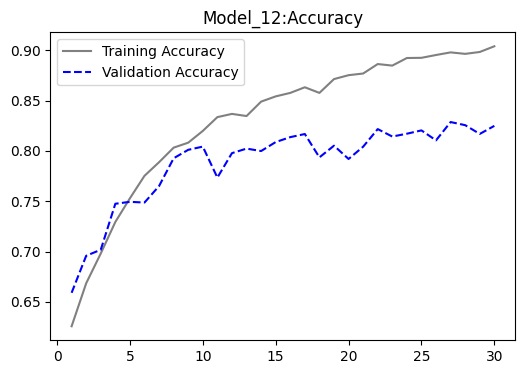

<Figure size 640x480 with 0 Axes>

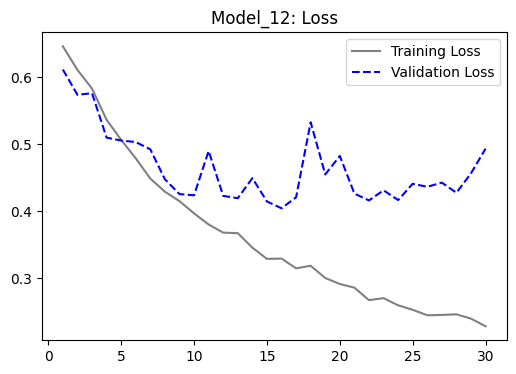

In [ ]:
accuracy = Pre_Model_3.history['accuracy']
val_accuracy = Pre_Model_3.history['val_accuracy']

loss = Pre_Model_3.history["loss"]
val_loss = Pre_Model_3.history["val_loss"]

epochs = range(1, len(accuracy) + 1)

plt.figure(figsize=(6,4))
plt.plot(epochs, accuracy, color="grey", label="Training Accuracy")
plt.plot(epochs, val_accuracy, color="blue",linestyle="dashed", label="Validation Accuracy")
plt.title("Model_12:Accuracy")
plt.legend()
plt.figure()

plt.figure(figsize=(6,4))
plt.plot(epochs, loss, color="grey", label="Training Loss")
plt.plot(epochs, val_loss, color="blue", linestyle="dashed", label="Validation Loss")
plt.title("Model_12: Loss")
plt.legend()
plt.show()

In [ ]:
test_model = load_model('premodel3.h5')
PreModel3_Results = test_model.evaluate(x_test,y_test)
print(f'Loss: {PreModel3_Results[0]:.3f}')
print(f'Accuracy: {PreModel3_Results[1]:.3f}')

157/157 [==============================] - 6s 35ms/step - loss: 0.9739 - accuracy: 0.5490
Loss: 0.974
Accuracy: 0.549


Using Golve we trained three model with different layer of lstm layer and sample size. We also observe that the accuracy decreased to 54.9% when we reduced the number of the number of LSTM layers and increased the sample size from 5000 to 15000.

RNNs are sequential models with recurrent connections that process input sequentially, while the Transformer Architecture is based on self-attention mechanisms and operates on entire sequences in parallel, making it more efficient for capturing long-range dependencies in sequences like natural language.
